## Objective of the project

The objective of this project is to investigate the accuracy and effectiveness of numerical methods, specifically finite difference methods, in solving the Black-Scholes Partial Differential Equation (PDE) for option pricing. By comparing the numerical solutions with the exact analytical solution, the project aims to assess the convergence, stability, and computational efficiency of the numerical approach in the context of financial modeling. Additionally, the study seeks to explore the impact of various numerical schemes on the quality of the approximation, including errors due to discretization, and to validate the numerical results by benchmarking them against the exact solution. This comparison will provide insights into the suitability of these methods for real-world financial applications, particularly for option pricing in dynamic markets.

## Black-Scholes Equation

The Black-Scholes partial differential equation (PDE) is given by:

$$
\frac{\partial V}{\partial t} (S,t) - \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} (S,t) - r S \frac{\partial V}{\partial S} (S,t) + r V(S,t) = 0
$$

where:
- $ V(S,t) $ is the option price as a function of asset price $ S $ and time $ t $.
- $ \sigma $ is the volatility of the underlying asset.
- $ r $ is the risk-free interest rate.

### Explanation of Terms
- $ \frac{\partial V}{\partial t} $ represents the rate of change of the option price with respect to time.
- $ \frac{\partial V}{\partial S} $ represents the first derivative of the option price with respect to the asset price.
- $ \frac{\partial^2 V}{\partial S^2} $ represents the second derivative of the option price with respect to the asset price.



## Numerical Approach of the PDE, Using the Explicit Method and FTCS
1. Discretizing the PDE.
   - Time: $\Delta T$
   - Space: $\Delta S$
2. Discretizing the derivatives.
   - Time derivative: $\frac{\partial V}{\partial t} (S,t) \approx \frac{V_i^{n+1} - V_i^n}{\Delta t}$
   - Space derivative
     - $1st:$ $\frac{\partial V}{\partial S} (S,t) \approx \frac{V_{i+1}^n - V_{i-1}^n}{2\Delta S}$
      
     - $2nd:$ $\frac{\partial^2 V}{\partial S^2} (S,t) \approx \frac{V_{i+1}^n - 2V_i^n + V_{i-1}^n}{(\Delta S)^2}$
    
- Substitute the above approximations to the Black Scholes PDE
- The final result is as follows,

$$
V_i^{n+1} = V_i^n + \Delta t \left[ \frac{1}{2} \sigma^2 S_i^2 \frac{V_{i+1}^n - 2V_i^n + V_{i-1}^n}{(\Delta S)^2} + r S_i \frac{V_{i+1}^n - V_{i-1}^n}{2\Delta S} - rV_i^n \right]
$$

### Boundary and Initial Conditions
#### Boundary Conditions:
- $ V(0,t) = 0 $ (At stock price $ S = 0 $, the option value is zero).
- $ V(S_{\text{max}}, t) = S_{\text{max}} - K e^{-r(T-t)} $ (At a very high stock price, the option price tends to its intrinsic value).

#### Initial Condition:
- $ V(S,0) = \max(S - K, 0) $ (For a European call option, where $ K $ is the strike price).

## Importing the Libraries

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Parameters

In [71]:
S_max = 300   # Maximum stock price
M = 100       # Number of stock price steps
N = 1000      # Number of time steps
K = 100       # Strike price
T = 1         # Time to maturity
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility

# Grid
S = np.linspace(1, S_max, M+1)
t = np.linspace(0, T, N+1)


delta_S = S[1] - S[0]       # Space step size
delta_t = t[1] - t[0]       # Time step size

# Option price grid
V = np.zeros((M+1, N+1))

# Initial condition (European call option)
V[:, 0] = np.maximum(S - K, 0)

# Boundary conditions
V[0, :] = 0  # At S = 0, option price is 0
V[M, :] = S_max - K * np.exp(-r * (T - t))  # At S_max, option price approaches S_max - K * exp(-r(T-t))

## Numerical and Exact Solutions Methods

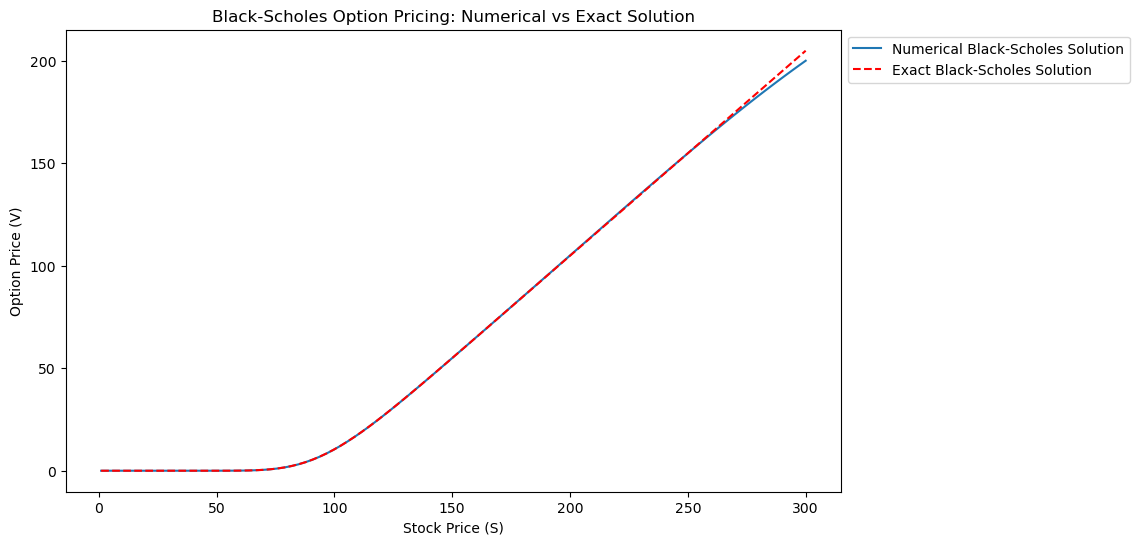

In [73]:
# Exact Black-Scholes solution
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

V_exact = black_scholes(S, K, T, r, sigma)

# Numerical Approach
# FTCS scheme for the explicit solution
for n in range(0, N):
    for i in range(1, M):
        dV = (V[i+1, n] - V[i-1, n]) / (2 * delta_S)
        
        d2V = (V[i+1, n] - 2*V[i, n] + V[i-1, n]) / delta_S**2
        
        V[i, n+1] = V[i, n] + delta_t * (0.5 * sigma**2 * S[i]**2 * d2V + r * S[i] * dV - r * V[i, n])

# Plot results
plt.figure(figsize=(10,6))
plt.plot(S, V[:, -1], label="Numerical Black-Scholes Solution")
plt.plot(S, V_exact, 'r--', label='Exact Black-Scholes Solution')
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price (V)")
plt.title("Black-Scholes Option Pricing: Numerical vs Exact Solution")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.show()

## Absolute Error

In [75]:
# Calculate error at final time step
error = np.abs(V[:, -1] - V_exact)

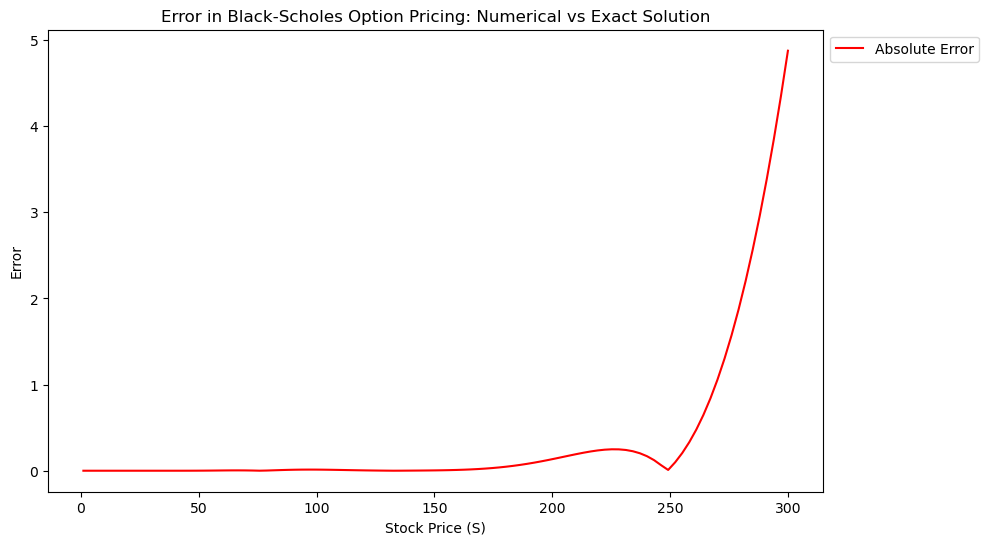

In [76]:
# Plot error
plt.figure(figsize=(10,6))
plt.plot(S, error, label="Absolute Error", color='r')
plt.xlabel("Stock Price (S)")
plt.ylabel("Error")
plt.title("Error in Black-Scholes Option Pricing: Numerical vs Exact Solution")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.show()

## Conclusions

- The numerical FTCS (Forward Time Central Space) scheme performed reasonably well in approximating the exact Black-Scholes solution for option pricing. The plotted results indicate that the numerical approximation follows the general trend of the exact solution. However, due to the explicit nature of the FTCS method, stability constraints (such as the Courant-Friedrichs-Lewy condition) must be carefully considered to prevent divergence, especially for small time steps or large volatility values.

- In the context of financial modeling, numerical approaches like FTCS provide valuable tools for pricing derivative securities when analytical solutions are difficult or impossible to obtain. They allow for flexibility in handling complex payoffs, varying interest rates, and non-constant volatility models. However, more stable and efficient schemes, such as the Crank-Nicolson method or implicit finite difference methods, are often preferred for practical applications due to their superior stability properties.

- Future improvements could involve exploring more stable numerical techniques and refining discretization parameters to enhance accuracy and computational efficiency.